In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import sqlite3
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, auc, confusion_matrix

In [2]:
df = pd.read_csv('./SynthFraud.csv')

In [3]:
#so that our data do not have the ... limit by pandas
pd.set_option('display.max_columns', None)  # None means no limit
# Disable scientific notation for floating-point numbers
pd.set_option('display.float_format', '{:.6f}'.format)

In [4]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0,0
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0,0
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0,0
5,1,PAYMENT,7817.710000,C90045638,53860.000000,46042.290000,M573487274,0.000000,0.000000,0,0
6,1,PAYMENT,7107.770000,C154988899,183195.000000,176087.230000,M408069119,0.000000,0.000000,0,0
7,1,PAYMENT,7861.640000,C1912850431,176087.230000,168225.590000,M633326333,0.000000,0.000000,0,0
8,1,PAYMENT,4024.360000,C1265012928,2671.000000,0.000000,M1176932104,0.000000,0.000000,0,0
9,1,DEBIT,5337.770000,C712410124,41720.000000,36382.230000,C195600860,41898.000000,40348.790000,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000
mean,243.397246,179861.903549,833883.104074,855113.668579,1100701.666520,1224996.398202,0.001291,0.000003
std,142.331971,603858.231463,2888242.673038,2924048.502954,3399180.112994,3674128.942120,0.035905,0.001586
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,13389.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,239.000000,74871.940000,14208.000000,0.000000,132705.665000,214661.440000,0.000000,0.000000
75%,335.000000,208721.477500,107315.175000,144258.410000,943036.707500,1111909.250000,0.000000,0.000000
max,743.000000,92445516.640000,59585040.370000,49585040.370000,356015889.350000,356179278.920000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#Checking amount of target variable
print(df['isFraud'].sum())
print(df['isFlaggedFraud'].sum())

8213
16


In [9]:
#Feature Engineering
df["days"] = round(df["step"] / 24,2)

In [10]:
# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Write the DataFrame to SQLite as a table
df.to_sql('df', conn, if_exists='replace', index=False)

# SQL query with transformations
query = """
SELECT 
    step,
    type,
    amount,
    nameOrig,
    oldbalanceOrg,
    newbalanceOrig,
    nameDest,
    oldbalanceDest,
    newbalanceDest,
    isFraud,
    isFlaggedFraud,
    days,
    -- Calculate balance difference for origin account
    (newbalanceOrig - oldbalanceOrg) AS balance_change_orig,
    -- Flag transactions involving merchants
    CASE 
        WHEN nameDest LIKE 'M%' THEN 1 
        ELSE 0 
    END AS is_merchant_dest
FROM df
"""

# Load transformed data into a DataFrame
df = pd.read_sql_query(query, conn)

conn.close()

# Preview the first few rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days,balance_change_orig,is_merchant_dest
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0,0,0.040000,-9839.640000,1
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0,0,0.040000,-1864.280000,1
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0,0.040000,-181.000000,0
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0,0.040000,-181.000000,0
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0,0,0.040000,-11668.140000,1


In [11]:
df.shape

(6362620, 14)

In [12]:
# Adding balance change ratio
df['balance_change_ratio_orig'] = df['balance_change_orig'] / df['oldbalanceOrg'].replace(0, np.nan)
df['balance_change_ratio_orig'] = df['balance_change_ratio_orig'].fillna(0)

In [13]:
# Adding if account is $0
df['is_account_drained'] = (df['newbalanceOrig'] == 0).astype(int)

In [14]:
# Adding real balance to handle cases that should go beyond 0 balance, resulting in negative balance. Mosts cases will be '0'. 
df['real_balance'] = df['balance_change_orig'] - df['amount']

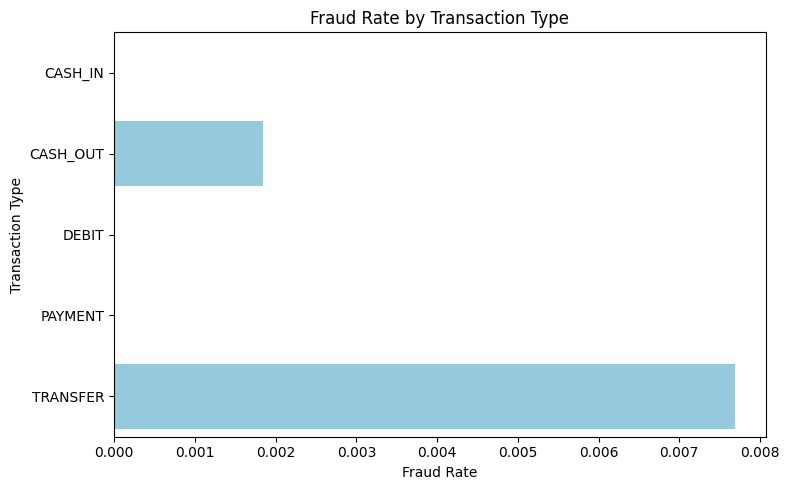

In [15]:
# Fraudrate by transaction type
fraud_rate_by_type = df.groupby('type')['isFraud'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='isFraud', y='type', data=fraud_rate_by_type, color='skyblue')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Fraud Rate')
plt.ylabel('Transaction Type')
plt.tight_layout()
plt.show()

days_binned
[0, 5)      1065448
[5, 10)     2121044
[10, 15)    1996057
[15, 20)     856888
[20, 25)     219592
[25, 31)     103591
Name: count, dtype: int64


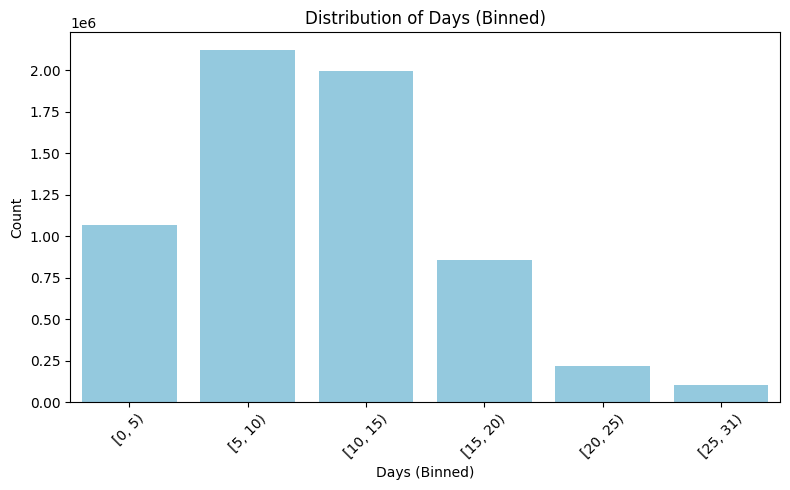

In [16]:
# binning days, last bin having an additional day to 31.
bin_edges = [0, 5, 10, 15, 20, 25, 31] 

# Bin the 'days' column
df['days_binned'] = pd.cut(df['days'], bins=bin_edges, include_lowest=True, right=False)

# View the bin counts
print(df['days_binned'].value_counts().sort_index())

# Bar/count plot for Distribution of transaction on days binned
plt.figure(figsize=(8, 5))
sns.countplot(x='days_binned', data=df, color='skyblue')
plt.title('Distribution of Days (Binned)')
plt.xlabel('Days (Binned)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\iareL\AppData\Local\Temp\ipykernel_28076\1525153958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_merchant_dest', y='isFraud', data=fraud_rate, palette=['blue', 'red'])


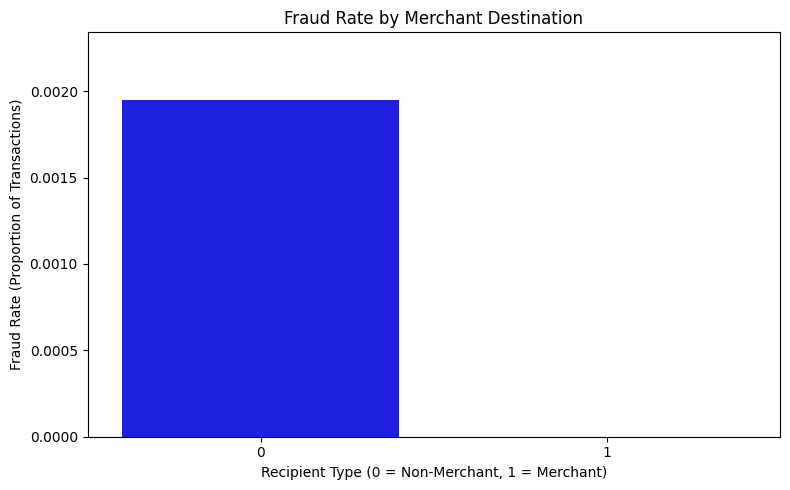

In [17]:
# Bar plot for Fraud rate if recipient is a merchant or not
fraud_rate = df.groupby('is_merchant_dest')['isFraud'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='is_merchant_dest', y='isFraud', data=fraud_rate, palette=['blue', 'red'])
plt.title('Fraud Rate by Merchant Destination')
plt.xlabel('Recipient Type (0 = Non-Merchant, 1 = Merchant)')
plt.ylabel('Fraud Rate (Proportion of Transactions)')
plt.ylim(0, max(fraud_rate['isFraud']) * 1.2)  # Adjust y-axis for visibility
plt.tight_layout()
plt.show()

C:\Users\iareL\AppData\Local\Temp\ipykernel_28076\3539735364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, palette=['blue', 'red'])


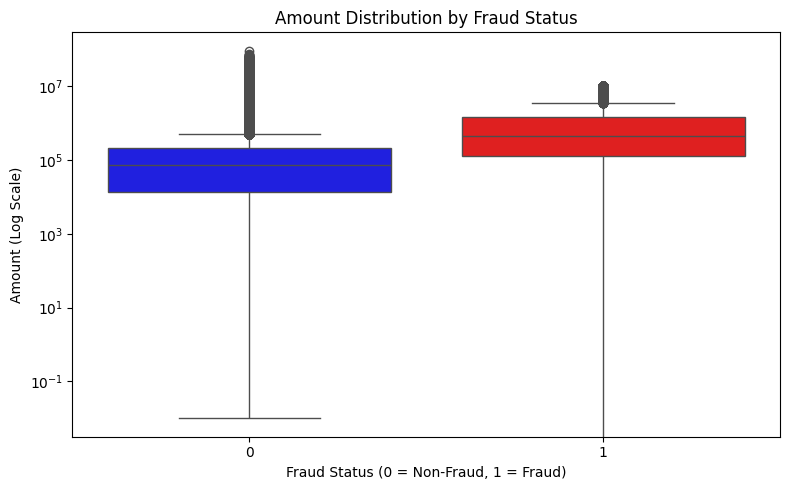

In [18]:
# Box plot Distribution of transaction amount by fraud status(1, 0)
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='amount', data=df, palette=['blue', 'red'])
plt.yscale('log')
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Amount (Log Scale)')
plt.tight_layout()
plt.show()

C:\Users\iareL\AppData\Local\Temp\ipykernel_28076\1842535452.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_prop = df.groupby('days_binned')['isFraud'].value_counts(normalize=True).unstack().fillna(0)


<Figure size 1000x600 with 0 Axes>

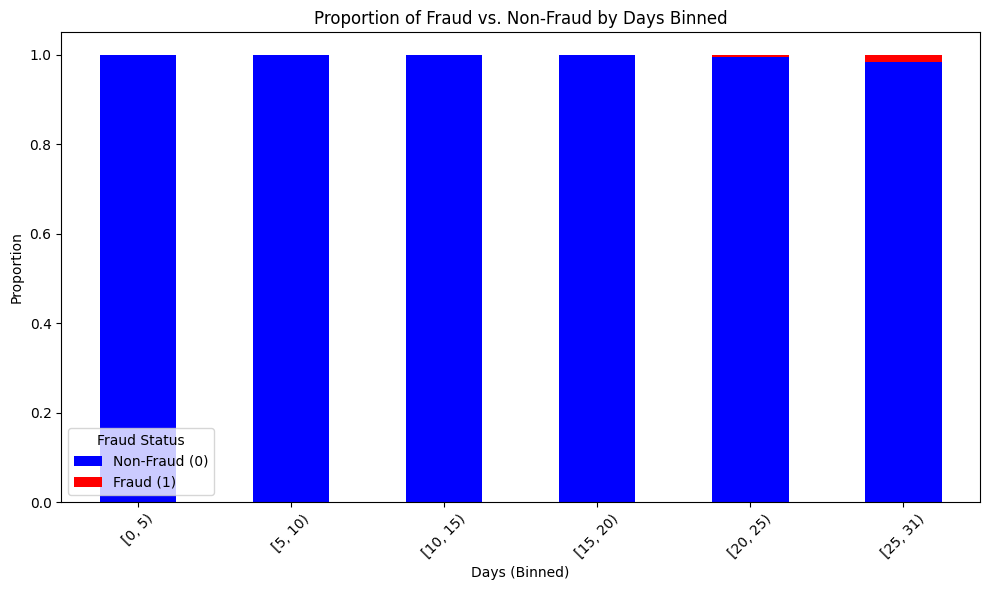

In [19]:
# Stack bar plot for fraud vs non-fraud by days
fraud_prop = df.groupby('days_binned')['isFraud'].value_counts(normalize=True).unstack().fillna(0)
fraud_prop.columns = ['Non-Fraud (0)', 'Fraud (1)']

plt.figure(figsize=(10, 6))
fraud_prop.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10, 6))
plt.title('Proportion of Fraud vs. Non-Fraud by Days Binned')
plt.xlabel('Days (Binned)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Fraud Status')
plt.tight_layout()
plt.show()

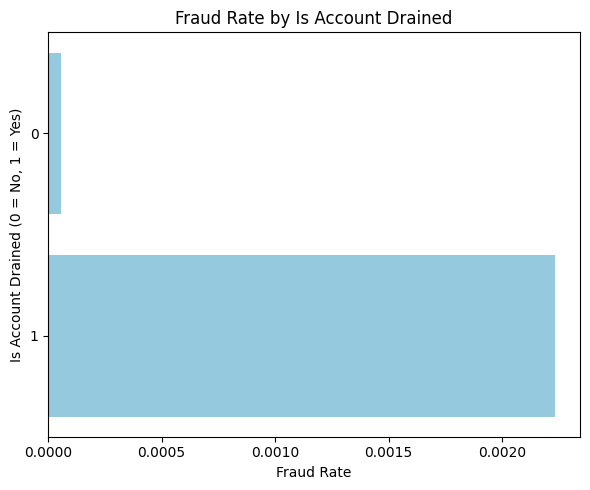

In [20]:
# Bar plot for fraud rate to if account is drained
fraud_rate_by_drained = df.groupby('is_account_drained')['isFraud'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(x='isFraud', y='is_account_drained', data=fraud_rate_by_drained, color='skyblue', orient='h')
plt.title('Fraud Rate by Is Account Drained')
plt.xlabel('Fraud Rate')
plt.ylabel('Is Account Drained (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

C:\Users\iareL\AppData\Local\Temp\ipykernel_28076\171036771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='real_balance', data=df, palette=['blue', 'red'])


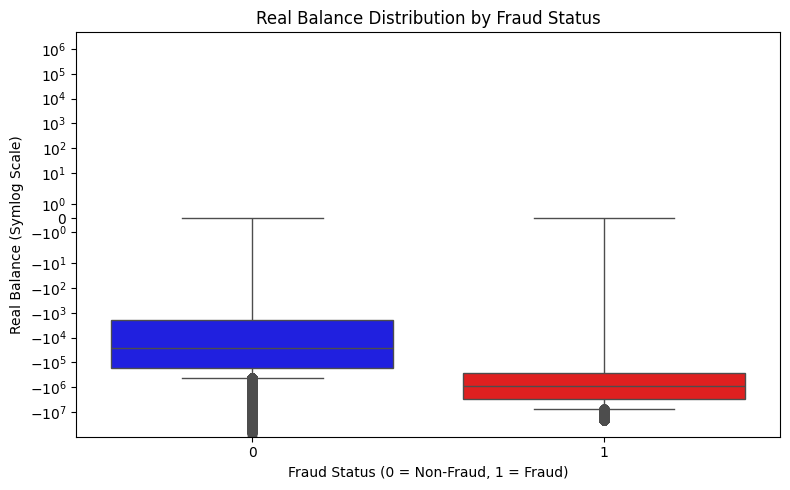

In [21]:
# Boxplot for real balance(negative amount) to fraud rate
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='real_balance', data=df, palette=['blue', 'red'])
plt.yscale('symlog')  # Symlog scale to handle positive, negative, and zero values
plt.title('Real Balance Distribution by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Real Balance (Symlog Scale)')
plt.tight_layout()
plt.show()

In [22]:
# Create dummy variables for the 'type' column
df_dummies = pd.get_dummies(df['type'], prefix='type', drop_first=True)

# Add the dummy columns to the original DataFrame
df = pd.concat([df, df_dummies], axis=1)
#df = df.drop('type', axis=1)
#retaining type for visualisation

In [23]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,days,balance_change_orig,is_merchant_dest,balance_change_ratio_orig,is_account_drained,real_balance,days_binned,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0,0,0.040000,-9839.640000,1,-0.057834,0,-19679.280000,"[0, 5)",False,False,True,False
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0,0,0.040000,-1864.280000,1,-0.087735,0,-3728.560000,"[0, 5)",False,False,True,False
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0,0.040000,-181.000000,0,-1.000000,1,-362.000000,"[0, 5)",False,False,False,True
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0,0.040000,-181.000000,0,-1.000000,1,-362.000000,"[0, 5)",True,False,False,False
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0,0,0.040000,-11668.140000,1,-0.280795,0,-23336.280000,"[0, 5)",False,False,True,False


In [24]:
# logisticRegression 1st model
# Define features and target 
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'days', 'balance_change_orig', 'is_merchant_dest','real_balance',
            'balance_change_ratio_orig', 'is_account_drained',
            'type_CASH_OUT', 'type_TRANSFER']
X = df[features]
y = df['isFraud']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust threshold to maximize F1-Score
precision_array, recall_array, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision_array * recall_array) / (precision_array + recall_array)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
# Print results
print(f"Baseline Model (Logistic Regression) Results:")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
#Precision: 0.7482, Recall: 0.5173, F1-Score: 0.6117

Baseline Model (Logistic Regression) Results:
Optimal Threshold: 0.9990
Precision: 0.7482, Recall: 0.5173, F1-Score: 0.6117
Confusion Matrix:
 [[1270595     286]
 [    793     850]]


In [25]:
#logisticRegression 2nd model
# Define features and target 
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'days', 'balance_change_orig', 'is_merchant_dest','real_balance',
            'balance_change_ratio_orig', 'is_account_drained',
            'type_CASH_OUT', 'type_TRANSFER']
X = df[features]
y = df['isFraud']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Set manual threshold to 90% 
manual_threshold = 0.9
y_pred = (y_pred_proba >= manual_threshold).astype(int)

# Evaluate
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
# Print results
print(f"Baseline Model (Logistic Regression) Results:")
print(f"Manual Threshold: {manual_threshold:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
#Precision: 0.1620, Recall: 0.7967, F1-Score: 0.2692

Baseline Model (Logistic Regression) Results:
Manual Threshold: 0.9000
Precision: 0.1620, Recall: 0.7967, F1-Score: 0.2692
Confusion Matrix:
 [[1264108    6773]
 [    334    1309]]


In [26]:
#Identifying outliers in these features 
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'days', 'balance_change_orig']

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check outliers for each numerical column
for col in num_cols:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}: {len(outliers)} rows")
    
    # Check how many outliers are fraud (y = 1 means fraud)
    Fraud_Trans = outliers[outliers['isFraud'] == 1]
    print(f"Fraud transactions: {len(Fraud_Trans)} rows\n")

Outliers in amount: 338078 rows
Fraud transactions: 3854 rows

Outliers in oldbalanceOrg: 1112507 rows
Fraud transactions: 4966 rows

Outliers in newbalanceOrig: 1053391 rows
Fraud transactions: 155 rows

Outliers in oldbalanceDest: 786135 rows
Fraud transactions: 466 rows

Outliers in newbalanceDest: 738527 rows
Fraud transactions: 1099 rows

Outliers in days: 102688 rows
Fraud transactions: 1570 rows

Outliers in balance_change_orig: 2139299 rows
Fraud transactions: 7572 rows



In [27]:
# Performing log transformation for these features
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 
            'newbalanceDest', 'balance_change_orig']:
    df[f'{col}_log'] = np.log1p(df[col].clip(lower=0))

In [28]:
# Random Forest
# Define features and target
features = ['amount_log', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest_log', 
            'newbalanceDest_log', 'days', 'balance_change_orig_log', 'is_merchant_dest', 
            'real_balance', 'balance_change_ratio_orig', 'is_account_drained', 
            'type_CASH_OUT', 'type_TRANSFER',]

X = df[features]
y = df['isFraud']

# Split the data (same split as your previous models)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest with class weights
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust threshold to maximize F1-Score
precision_array, recall_array, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision_array * recall_array) / (precision_array + recall_array)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Print results
print("Random Forest Results:")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
#Precision: 0.9158, Recall: 0.8673, F1-Score: 0.8909

Random Forest Results:
Optimal Threshold: 0.2900
Precision: 0.9158, Recall: 0.8673, F1-Score: 0.8909
Confusion Matrix:
 [[1270750     131]
 [    218    1425]]


In [29]:
# Aggregate data for visualisation in tableau
agg_df = df.groupby(['type','days_binned']).agg({
    'amount': ['sum', 'mean', 'count'],
    'oldbalanceOrg': 'mean',
    'newbalanceOrig': 'mean',
    'oldbalanceDest': 'mean',
    'newbalanceDest': 'mean',
    'balance_change_orig': ['sum', 'mean', 'count'],
    'balance_change_ratio_orig': 'mean',
    'isFraud': ['sum', 'mean', 'count'], 
    'is_account_drained': 'sum',
    'days': 'sum',
    'real_balance' : ['sum', 'mean', 'count']
}).reset_index()

# Flatten column names
agg_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in agg_df.columns]

# Save aggregated dataset to CSV
#agg_df.to_csv('aggregated_fraud_data.csv', index=False)

# Check size
print(f"Aggregated shape: {agg_df.shape}")

C:\Users\iareL\AppData\Local\Temp\ipykernel_28076\2682016488.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['type','days_binned']).agg({


Aggregated shape: (30, 21)
